## Regression Week 3: Polynomial Regression Quiz

In this notebook you will compare different regression models in order to assess which model fits best. We will be using polynomial regression as a means to examine this topic. In particular you will:

- Write a function to take an an array and a degree and return an data frame where each column is the array to a polynomial value up to the total degree.
- Use a plotting tool (e.g. matplotlib) to visualize polynomial regressions
- Use a plotting tool (e.g. matplotlib) to visualize the same polynomial degree on different subsets of the data
- Use a validation set to select a polynomial degree
- Assess the final fit using test data

http://bigdata-madesimple.com/how-to-run-linear-regression-in-python-scikit-learn/  how to build linear regression in scikit-learn

In [106]:
from pandas import DataFrame, read_csv
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [25]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [13]:
train=pd.read_csv(r'/Users/fengxiao/Documents/Coursera HM/Coursera_homework/WU Linear Regression/week3/wk3_kc_house_train_data.csv',index_col=False, header=0,dtype = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})

In [120]:
validate=train=pd.read_csv(r'/Users/fengxiao/Documents/Coursera HM/Coursera_homework/WU Linear Regression/week3/wk3_kc_house_valid_data.csv',index_col=False, header=0,dtype = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})

In [122]:
print len(train)

9635


In [14]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
1,7237550310,20140512T000000,1225000.0,4.0,4.50,5420.0,101930,1,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760.0,101930.0
2,9212900260,20140527T000000,468000.0,2.0,1.00,1160.0,6000,1,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330.0,6000.0
3,0114101516,20140528T000000,310000.0,3.0,1.00,1430.0,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780.0,12697.0
4,6054650070,20141007T000000,400000.0,3.0,1.75,1370.0,9680,1,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370.0,10208.0


In [16]:
train['bedrooms'].apply(lambda x:x**3)

0        64.0
1        64.0
2         8.0
3        27.0
4        27.0
5        64.0
6        64.0
7        64.0
8       125.0
9         8.0
10       27.0
11       27.0
12       27.0
13       27.0
14       64.0
15       64.0
16      125.0
17       27.0
18       27.0
19       27.0
20       64.0
21       27.0
22       27.0
23      125.0
24       27.0
25       27.0
26       27.0
27       64.0
28       27.0
29      125.0
        ...  
9731    125.0
9732     64.0
9733      8.0
9734     27.0
9735     64.0
9736    125.0
9737     64.0
9738     27.0
9739     27.0
9740     27.0
9741      8.0
9742     27.0
9743      8.0
9744     27.0
9745     64.0
9746     64.0
9747     27.0
9748    125.0
9749     64.0
9750      8.0
9751    125.0
9752     64.0
9753     64.0
9754    125.0
9755     27.0
9756     27.0
9757     64.0
9758     64.0
9759      8.0
9760      8.0
Name: bedrooms, dtype: float64

In [29]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1']=feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name]=feature.apply(lambda x:x**power)
    return poly_dataframe


In [24]:
polynomial_dataframe('bedrooms',2) #test

,power_1,power_2
0,4.0,16.0
1,4.0,16.0
2,2.0,4.0
3,3.0,9.0
4,3.0,9.0
5,4.0,16.0
6,4.0,16.0
7,4.0,16.0
8,5.0,25.0
9,2.0,4.0


3 For the remainder of the assignment we will be working with the house Sales data as in the previous notebooks. Load in the data and also sort the sales SFrame by ‘sqft_living’. When we plot the fitted values we want to join them up in a line and this works best if the variable on the X-axis (which will be ‘sqft_living’) is sorted. For houses with identical square footage, we break the tie by their prices.

In [27]:
sales = pd.read_csv(r'/Users/fengxiao/Documents/Coursera HM/Coursera_homework/WU Linear Regression/week3/kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort(['sqft_living','price'])

/Users/fengxiao/anaconda/envs/WU_ML/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [28]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0.0,0.00,290.0,20875,1,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620.0,22850.0
15381,2856101479,20140701T000000,276000.0,1.0,0.75,370.0,1801,1,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340.0,5000.0
860,1723049033,20140620T000000,245000.0,1.0,0.75,380.0,15000,1,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170.0,15000.0
18379,1222029077,20141029T000000,265000.0,0.0,0.75,384.0,213444,1,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920.0,224341.0
4868,6896300380,20141002T000000,228000.0,0.0,1.00,390.0,5900,1,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170.0,6000.0


In [31]:
poly1_data = polynomial_dataframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price']

In [35]:
poly1_data

,power_1,price
19452,290.0,142000.0
15381,370.0,276000.0
860,380.0,245000.0
18379,384.0,265000.0
4868,390.0,228000.0
21332,390.0,245000.0
8623,410.0,325000.0
11500,420.0,229050.0
14466,420.0,280000.0
465,430.0,80000.0


Use graphlab.linear_regression.create (or another linear regression library) to compute the regression weights for predicting sales[‘price’] based on the 1 degree polynomial feature ‘sqft_living’. The result should be an intercept and slope.

In [40]:
x=DataFrame(poly1_data,columns=['power_1'])

In [41]:
y=poly1_data['price'].values.reshape(len(poly1_data),1)

In [42]:
model1=linear_model.LinearRegression().fit(x,y)

Next use the produce a scatter plot of the training data (just square feet vs price) and add the fitted model. e.g. with matplotlib and SFrames:

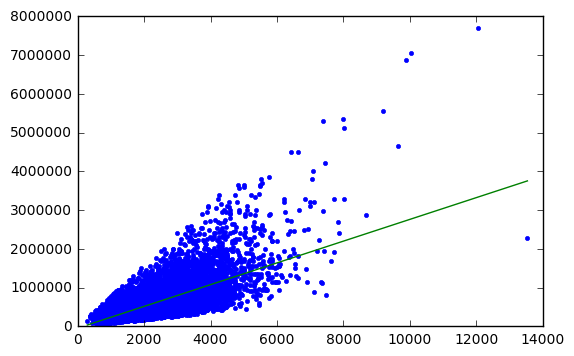

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',poly1_data['power_1'], model1.predict(x),'-')

Now that you have plotted the results using a 1st degree polynomial, try it again using a 2nd degree and 3rd degree polynomial. Look at the fitted lines, do they appear as you would expect?

In [45]:
poly2_data=polynomial_dataframe(sales['sqft_living'], 2)

In [48]:
poly2_data['price']=sales['price']

In [51]:
x2=DataFrame(poly2_data,columns=['power_1','power_2'])

In [52]:
model2=linear_model.LinearRegression().fit(x2,y)

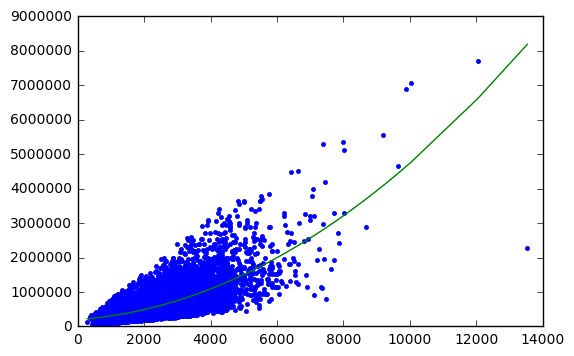

In [57]:
plt.plot(poly2_data['power_1'],poly2_data['price'],'.',poly2_data['power_1'], model2.predict(x2),'-')

In [63]:
poly3_data=polynomial_dataframe(sales['sqft_living'], 3)


In [64]:
poly3_data['price']=sales['price']


In [65]:
x3=DataFrame(poly3_data,columns=['power_1','power_2','power_3'])


In [66]:
model3=linear_model.LinearRegression().fit(x3,y)


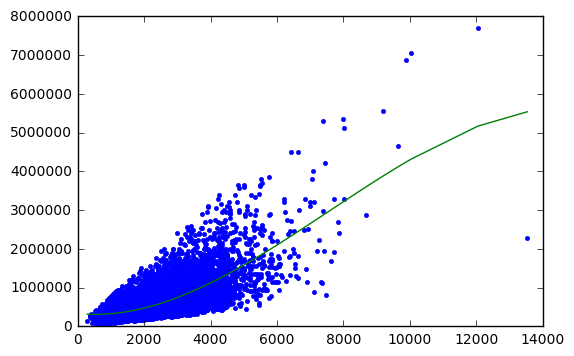

In [67]:
plt.plot(poly3_data['power_1'],poly3_data['price'],'.',poly3_data['power_1'], model3.predict(x3),'-')

 Now try a 15th degree polynomial. Print out the coefficients and look at the resulted fitted line. Do you think this degree is appropriate for these data? If we were to use a different subset of the data do you think we would get pretty much the same curve?

In [69]:
poly15_data=polynomial_dataframe(sales['sqft_living'],15)

In [70]:
poly15_data['price']=sales['price']

In [78]:
x15=DataFrame(poly15_data,columns=['power_15'])

In [79]:
model15=linear_model.LinearRegression().fit(x15,y)

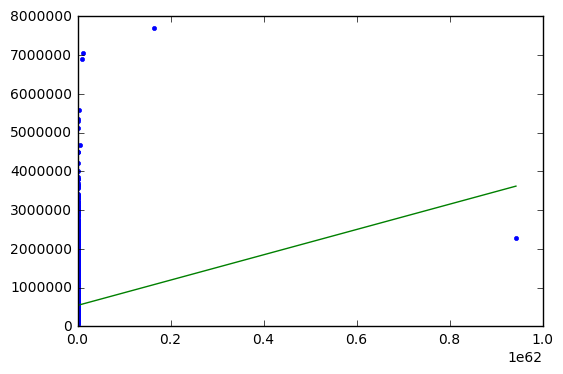

In [81]:
plt.plot(poly15_data['power_15'],poly15_data['price'],'.',poly15_data['power_15'], model15.predict(x15),'-')

In [82]:
sales1 = pd.read_csv(r'/Users/fengxiao/Documents/Coursera HM/Coursera_homework/WU Linear Regression/week3/wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
sales1 = sales.sort(['sqft_living','price'])

/Users/fengxiao/anaconda/envs/WU_ML/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [83]:
poly15_data=polynomial_dataframe(sales1['sqft_living'],15)

In [85]:
poly15_data['price']=sales1['price']

In [86]:
x15=DataFrame(poly15_data,columns=['power_15'])

In [87]:
model15=linear_model.LinearRegression().fit(x15,y)

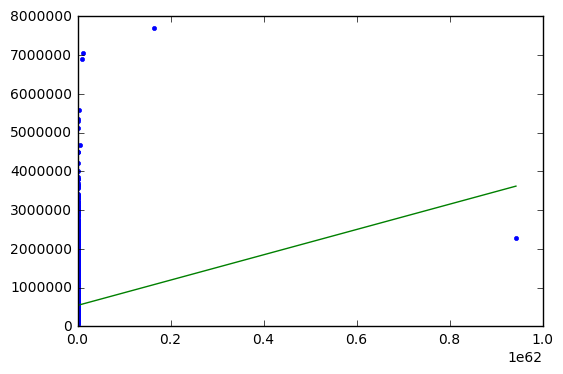

In [88]:
plt.plot(poly15_data['power_15'],poly15_data['price'],'.',poly15_data['power_15'], model15.predict(x15),'-')

Now for each degree from 1 to 15:

Build an polynomial data set using training_data[‘sqft_living’] as the feature and the current degree
Add training_data[‘price’] as a column to your polynomial data set
Learn a model on TRAINING data to predict ‘price’ based on your polynomial data set at the current degree
Compute the RSS on VALIDATION for the current model (print or save the RSS)


In [111]:
data=polynomial_dataframe(train['sqft_living'],1)
data['price']=train['price']
x=DataFrame(data,columns=['power_1'])
y=train['price'].values.reshape(len(train),1)
model=LinearRegression().fit(x,y)


#RRS=sum((yy-vali['price'])**2)

In [112]:
pred_train=model.predict(x)

In [114]:
print pred_train.shape

(9635, 1)


In [118]:
vali=polynomial_dataframe(validate['sqft_living'],1)
vali['price']=validate['price']
x_vali=DataFrame(vali, columns=['power_1'])

In [119]:
print x_vali.shape

(9635, 1)


In [123]:
pred_vali=model.predict(x_vali)

In [129]:
y_vali=vali['price'].values.reshape(len(vali),1)

In [130]:
print y_vali.shape

(9635, 1)


In [131]:
RRS=np.sum((y_vali-pred_vali)**2)

In [132]:
print RRS

6.26823800014e+14
